<H3>Strat√©gie Bollinger Trend</H3>
Indicateurs: bande de Bollinger + moyenne mobile long terme<br>
SEG

In [1]:
# Modules standards
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import ccxt
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../..')
# Modules perso
from class_BolTrend import BolTrend
from utilities.get_data import get_historical_from_db
from utilities.backtesting import basic_single_asset_backtest, plot_wallet_vs_asset, get_metrics, get_n_columns, plot_sharpe_evolution, plot_bar_by_month
from utilities.futur_simulations import plot_futur_simulations, plot_train_test_simulation

In [2]:
# Choix de la paire √† trader et de la plage de temps des bougies
pair = "ETH/USDT"
tf = "1h"

# Chargement des donn√©es dans un dataframe depuis la base de donn√©e /database
# mise √† jour √† faire avec "node download_data.js"
df = get_historical_from_db(
    ccxt.binance(), 
    pair,
    tf,
    path="../../../database/"
)

‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ R√©sultats backtest          ‚îÇ                                                        ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ P√©riode                     ‚îÇ 2018-01-01 -> 2023-01-19                               ‚îÇ
‚îÇ Portefeuille initial        ‚îÇ 1,000.00 $                                             ‚îÇ
‚îÇ                             ‚îÇ                                                        ‚îÇ
‚îÇ Portefeuille final          ‚îÇ 657,167.36 $                                        

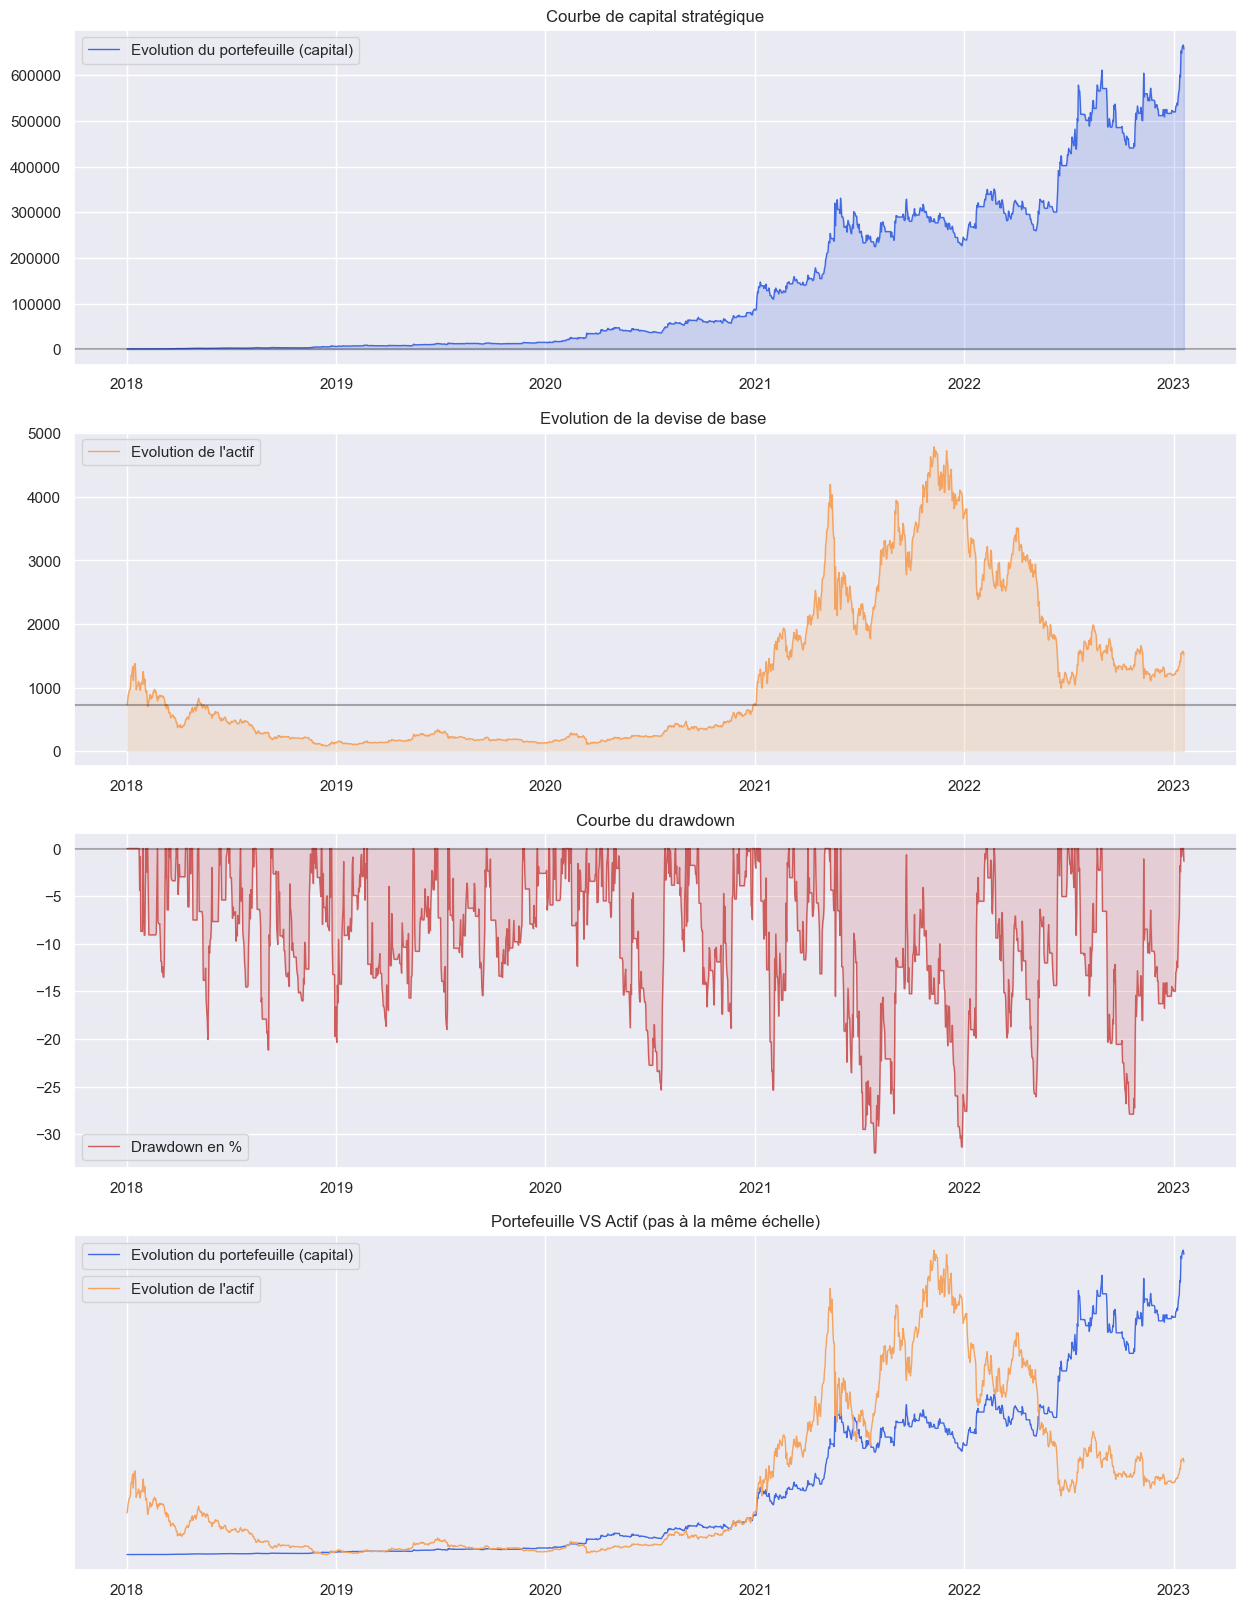

In [6]:
# Param√®tres √† modifier pour la strat√©gie
strat = BolTrend(
    df = df.loc["2018":],       # Date de d√©but et fin de l'analyse
    type=["long", "short", ],   # Choix de trader en long, short ou les deux
    bol_window = 100,           # Fen√™tre de la Bollinger
    bol_std = 2,              # D√©viation standard de la Bollinger
    min_bol_spread = 0,         # Spread entre les 2 bandes de Bollinger
    long_ma_window = 500        # Moyenne mobile long terme
)

strat.populate_indicators()
strat.populate_buy_sell()
bt_result = strat.run_backtest(initial_wallet=1000, leverage=1, maker_fee=0.00017, taker_fee=0.00051)
df_trades, df_days = basic_single_asset_backtest(trades=bt_result['trades'], days=bt_result['days'])
plot_wallet_vs_asset(df_days=df_days, log=False)

In [5]:
#plot_sharpe_evolution(df_days=df_days)

In [6]:
# Pour debug
df_trades.to_csv("df_trades.csv", index=False)

<H2>Courbe de surapprentissage</H2>

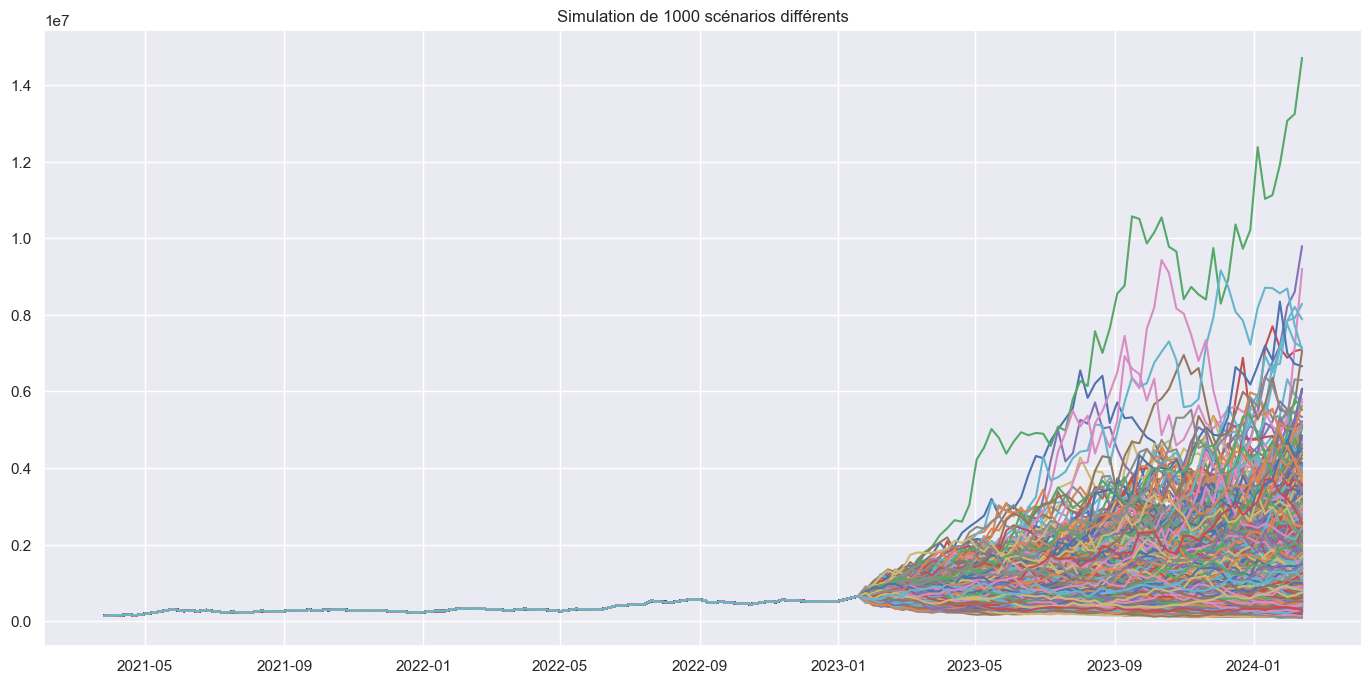

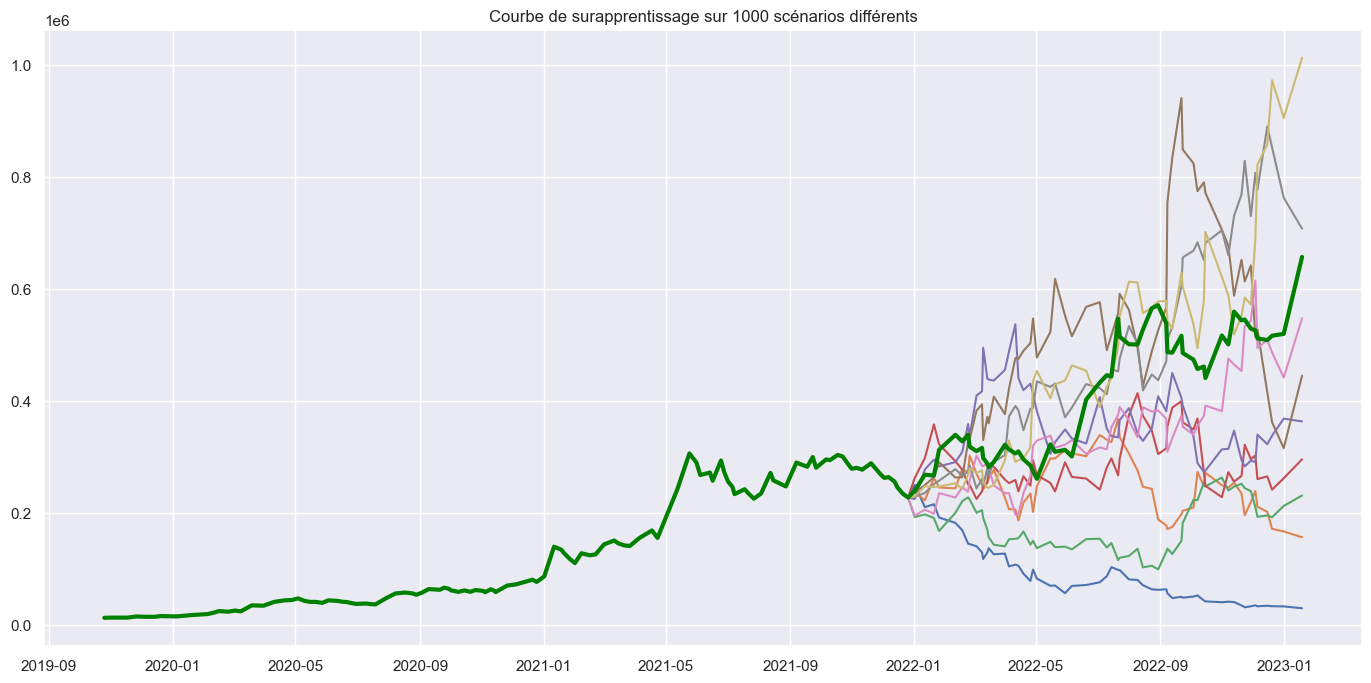

In [29]:
# Simulation de divers sc√©narios futurs
plot_futur_simulations(
    df_trades=df_trades,
    trades_multiplier=3,
    trades_to_forecast=60,
    number_of_simulations=1000,
    true_trades_to_show=100,
    show_all_simulations=True
)

# Comparaison entre les divers sc√©narios et la r√©alit√© pour voir si il y a du surapprentissage
# S√©paration des √©chantillons en train et en test - M√©thode de Monte Carlo (Loi normale)
plot_train_test_simulation(
    df_trades=df_trades,
    train_test_date="2022-01-01",
    trades_multiplier=3,
    number_of_simulations=1000,
)

----- 2018 Performances cumul√©es: 286.92% --


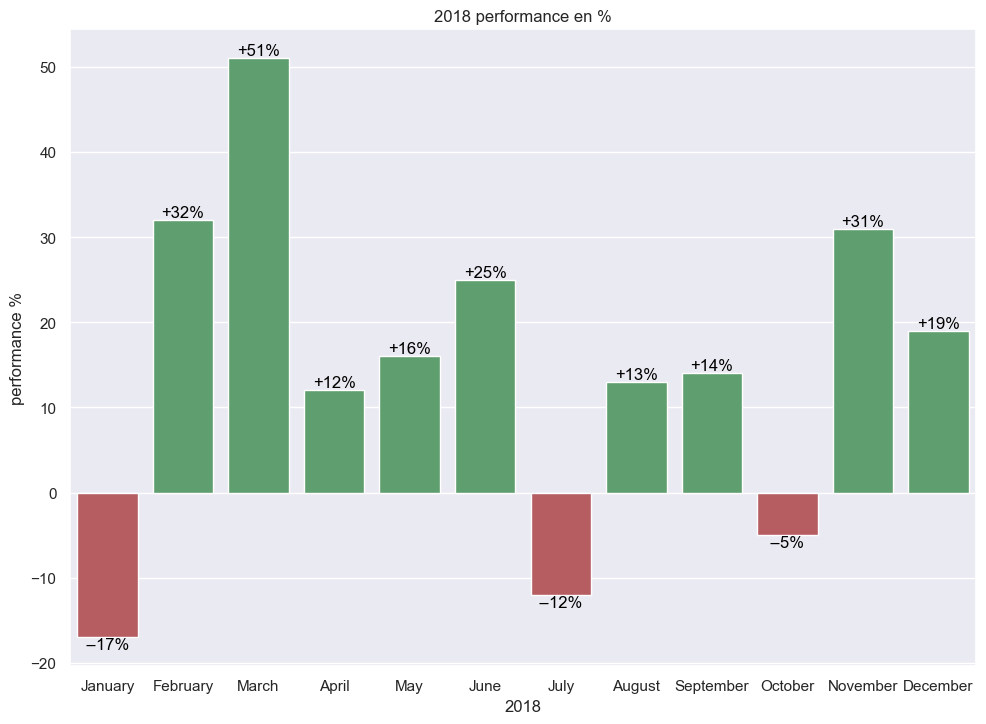

----- 2019 Performances cumul√©es: 159.03% --


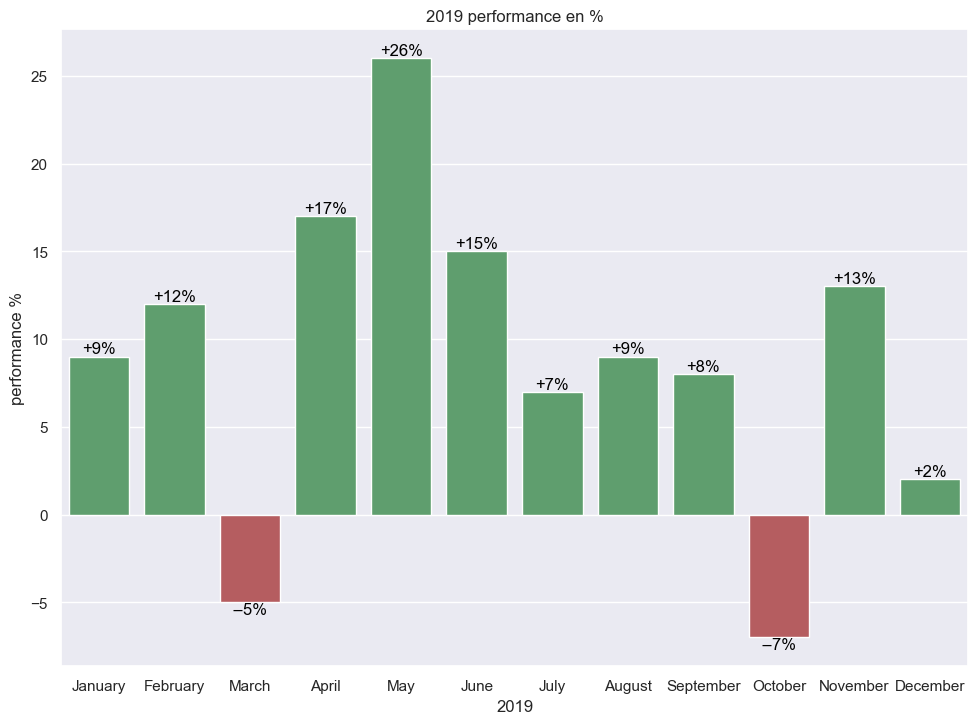

----- 2020 Performances cumul√©es: 473.95% --


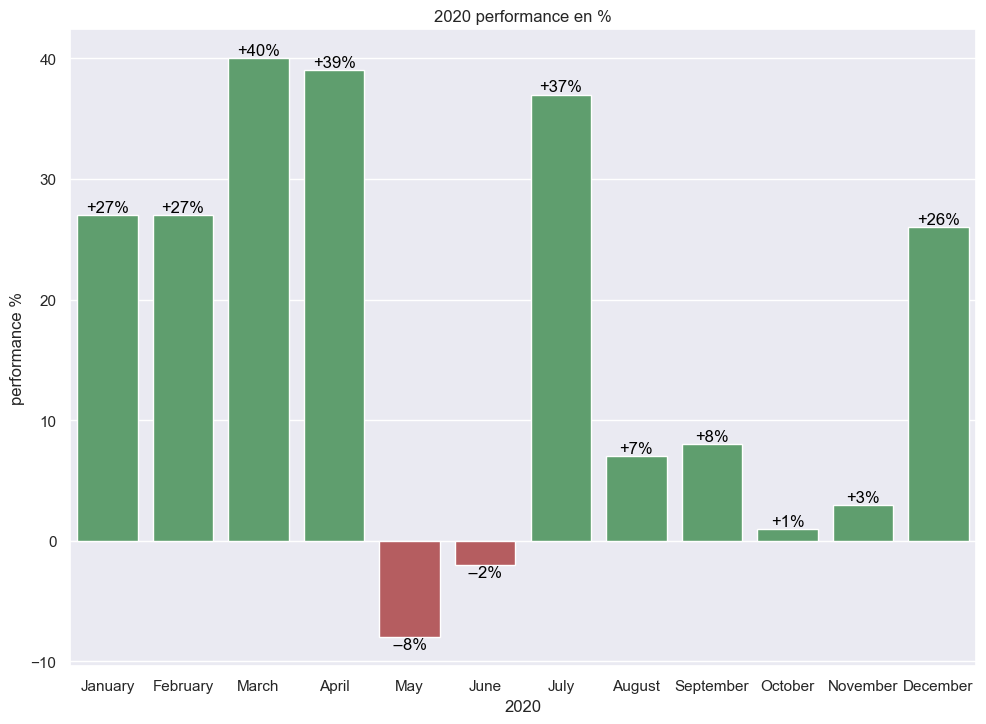

----- 2021 Performances cumul√©es: 189.12% --


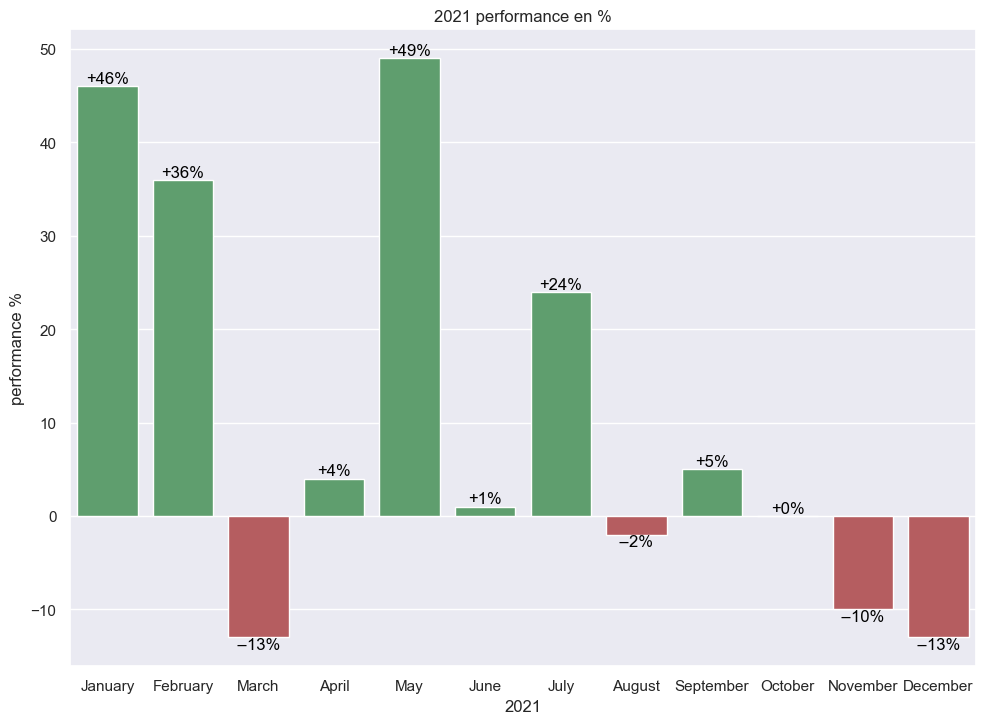

----- 2022 Performances cumul√©es: 161.97% --


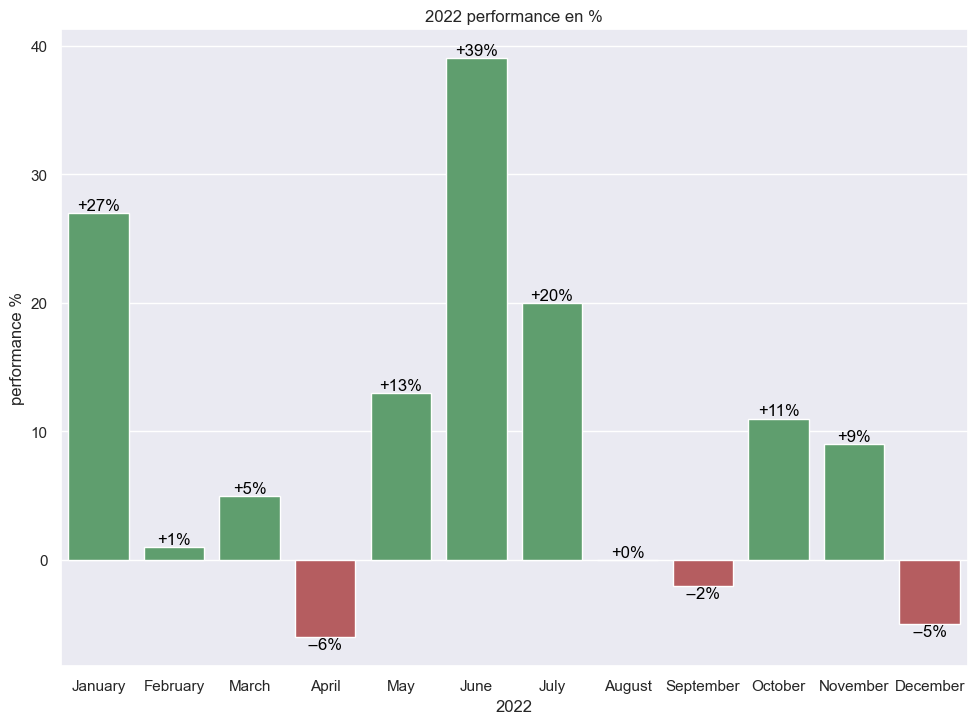

----- 2023 Performances cumul√©es: 21.67% --


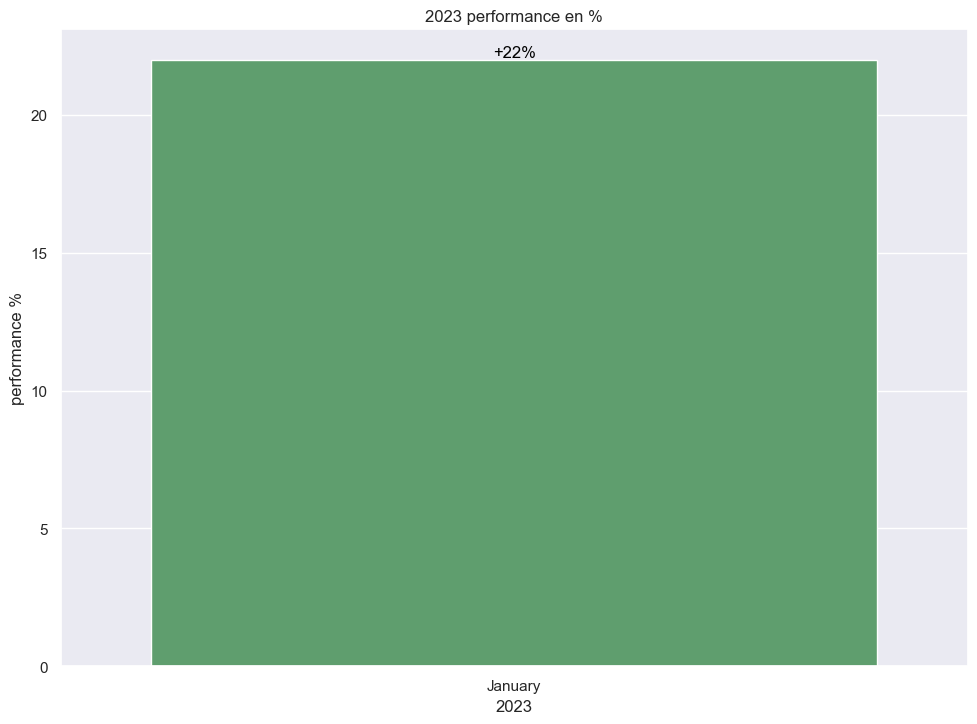

In [5]:
# Performance par mois et par ann√©es
plot_bar_by_month(df_days=df_days)

<H2>Optimisation des param√®tres</H2>

In [8]:
%load_ext Cython

In [12]:
# Optimisation des param√®tres de la strat√©gie bol_trend sur le sharpe ratio et le winrate
#%%cython
#import cython
from math import ceil
from IPython.display import clear_output
import time
from math import *

dt = None
dt = pd.DataFrame(columns = ['bol_window', 'bol_std', 'long_ma', 'sharpe_ratio', 'win_rate'])

#bol window
# loopI = [30,115,5]        #Standard
# loopI = [20,200,20]       #Recherche large
# loopI = [80,160,10]       #Recherche fine
loopI = [20,30,5]         #Pour test rapide
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

#bol std
# loopJ = [10,35,5]         #Standard
# loopJ = [10,45,5]        #Recherche large
# loopJ = [10,35,2]        #Recherche fine
loopJ = [10,15,5]         #Pour test rapide
enumJ = ceil((loopJ[1] - loopJ[0]) / loopJ[2])

#long ma
# loopK = [300,800,50]      #Standard
# loopK = [50,950,50]     #Recherche large
# loopK = [300,1000,50]    #Recherche fine
loopK = [300,400,50]      #Pour test rapide
enumK = ceil((loopK[1] - loopK[0]) / loopK[2])

count = 0
maxCount = enumI * enumJ * enumK
for i in range(loopI[0], loopI[1], loopI[2]):
    for j in range(loopJ[0], loopJ[1], loopJ[2]):
         for k in range(loopK[0], loopK[1], loopK[2]):
            new_bol_std=j/10
            clear_output(wait=True)
            count += 1
            print("Loading...",count,'/',maxCount)
            print(i, new_bol_std, k)

            # Param√®tres √† modifier pour la strat√©gie
            strat = BolTrend(
                df = df.loc["2020":],
                type=["long","short"],
                bol_window = i,
                bol_std = new_bol_std,
                min_bol_spread = 0,
                long_ma_window = k,
            )

            strat.populate_indicators()
            strat.populate_buy_sell()
            bt_result = strat.run_backtest(initial_wallet=1000, leverage=1, maker_fee=0.00017, taker_fee=0.00051)
            myrow = {'bol_window': i, 'bol_std': new_bol_std, 'long_ma': k, 'sharpe_ratio': bt_result['sharpe_ratio'], 'win_rate': bt_result['win_rate']*100}
            myrow = pd.DataFrame(myrow, index=[0])
            dt = pd.concat([dt, myrow], ignore_index=True) 


dt = dt.sort_values(by=['sharpe_ratio','win_rate'], ascending=False)
# fileName = "optimize/optimizer_ETH_1h_v1_large.csv"
fileName = "optimize/optimizer_ETH_1h_v1_fine.csv"
print("Sauvegarde dans le fichier " + fileName)
dt.to_csv(fileName, index=False)

Loading... 4 / 4
25 1.0 350
Sauvegarde dans le fichier optimize/optimizer_ETH_1h_v1_fine.csv


In [17]:
# Visualisation 3D des param√®tres
import plotly.graph_objects as go

dt_3d=pd.read_csv("optimize/optimizer_ETH_1h_v1_large.csv")

# Echantillon √† garder
quantile = 0.9

# Ne garder que les 30% des valeurs les plus hautes du Sharpe ratio
dt_3d_filtered = dt_3d[dt_3d['sharpe_ratio'] > dt_3d['sharpe_ratio'].quantile(quantile)]
# dt_3d_filtered = dt_3d[dt_3d['win_rate'] > dt_3d['win_rate'].quantile(quantile)]

fig = go.Figure(data=[go.Scatter3d(
    x=dt_3d_filtered['bol_window'], 
    y=dt_3d_filtered['bol_std'], 
    z=dt_3d_filtered['long_ma'], 
    mode='markers',
    marker=dict(size=dt_3d_filtered['win_rate'], sizemode='diameter', sizeref=1,
                color=dt_3d_filtered['sharpe_ratio'], colorscale='ylorrd', opacity=1,
                colorbar=dict(title='Sharpe Ratio', titleside='right',tickmode='array',
                tickvals=[dt_3d['sharpe_ratio'].min(),dt_3d['sharpe_ratio'].max()], 
                ticktext=[round(dt_3d_filtered['sharpe_ratio'].min(), 4), round(dt_3d_filtered['sharpe_ratio'].max(),4)]))
)])

# 'tealrose', 'tempo', 'temps', 'thermal', 'tropic', 'turbid','turbo', 'twilight', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr','ylorrd

# Mise en √©vidence des param√®tres les plus hauts
# fig.add_trace(go.Scatter3d(x=[65,65], y=[3,3], z=[dt_3d_filtered['long_ma'].min(), dt_3d_filtered['long_ma'].max()], mode='lines', line=dict(color='red')))

fig.update_layout(
    width=1000, height=800,
    title='Visualisation 3D des meilleurs param√®tres par rapport au Sharpe Ratio ('+ str(100-(quantile*100)) + '% des valeurs les plus hautes)<br><b>Winrate = taille des bulles',
    scene = dict(
                xaxis_title='Bollinger window',
                yaxis_title='Standard deviation ',
                zaxis_title='MA Long'
                )
)

fig.show()

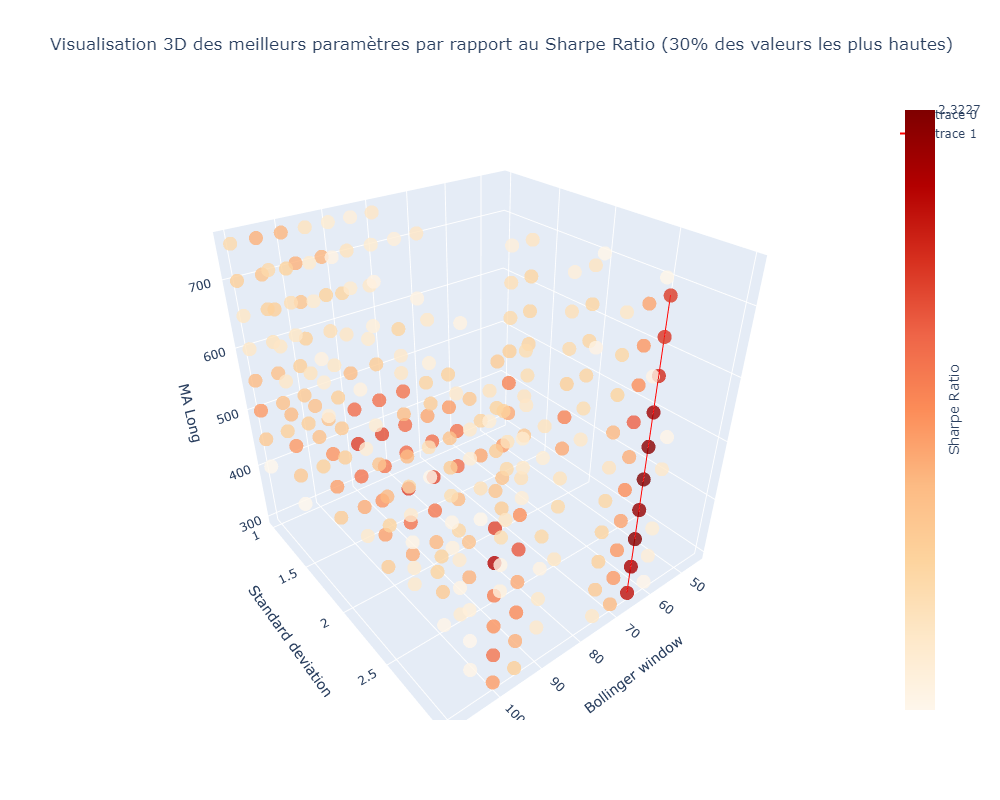

In [18]:
from IPython.display import Image
Image("3D.png")

In [19]:
# Optimisation des param√®tres avec optimize.minimize invers√© pour la maximisation (1/x)
import scipy.optimize as optimize
import time

def optimize_strategy(parameters):
    # R√©cup√©ration des param√®tres
    bol_window, bol_std, long_ma_window = parameters

    # Initialisation de la strat√©gie avec les param√®tres
    strat = BolTrend(
        df = df.loc["2020":],
        type=["long","short"],
        bol_window = bol_window,
        bol_std = bol_std,
        min_bol_spread = 0,
        long_ma_window = long_ma_window,
    )

    # Ex√©cution de la strat√©gie
    strat.populate_indicators()
    strat.populate_buy_sell()
    bt_result = strat.run_backtest(initial_wallet=1000, leverage=1, maker_fee=0.00017, taker_fee=0.00051)

    # Calcul et inversion du Sharpe ratio pour maximiser la valeur (la fonction minimize minimise la valeur)
    sharpe_ratio = bt_result['sharpe_ratio']
    return -sharpe_ratio


# D√©finition des valeurs initiales des param√®tres
x0 = [100, 2.25, 500]
bounds = [(50, 120), 
          (1.0, 3.5),
          (200, 800),]

# Ex√©cution de l'optimisation pour chaque combinaison de valeurs initiales
results = []
start_time = time.time()
result = optimize.minimize(optimize_strategy, x0, bounds=bounds)
results.append(result)
end_time = time.time()
print(f"Temps d'ex√©cution : {end_time - start_time:.2f} secondes")

# R√©cup√©ration des meilleurs param√®tres
best_result = min(results, key=lambda x: x.fun)
bol_window, bol_std, long_ma_window = best_result.x
print(f"Les meilleurs param√®tres sont: bol_window={bol_window}, bol_std={bol_std}, long_ma_window={long_ma_window}")


Temps d'ex√©cution : 5.14 secondes
Les meilleurs param√®tres sont: bol_window=100.0, bol_std=2.25, long_ma_window=500.0


<H2>Graphique de la balance r√©elle du wallet Bitget<br>
Robot trading bol_trend</H2>

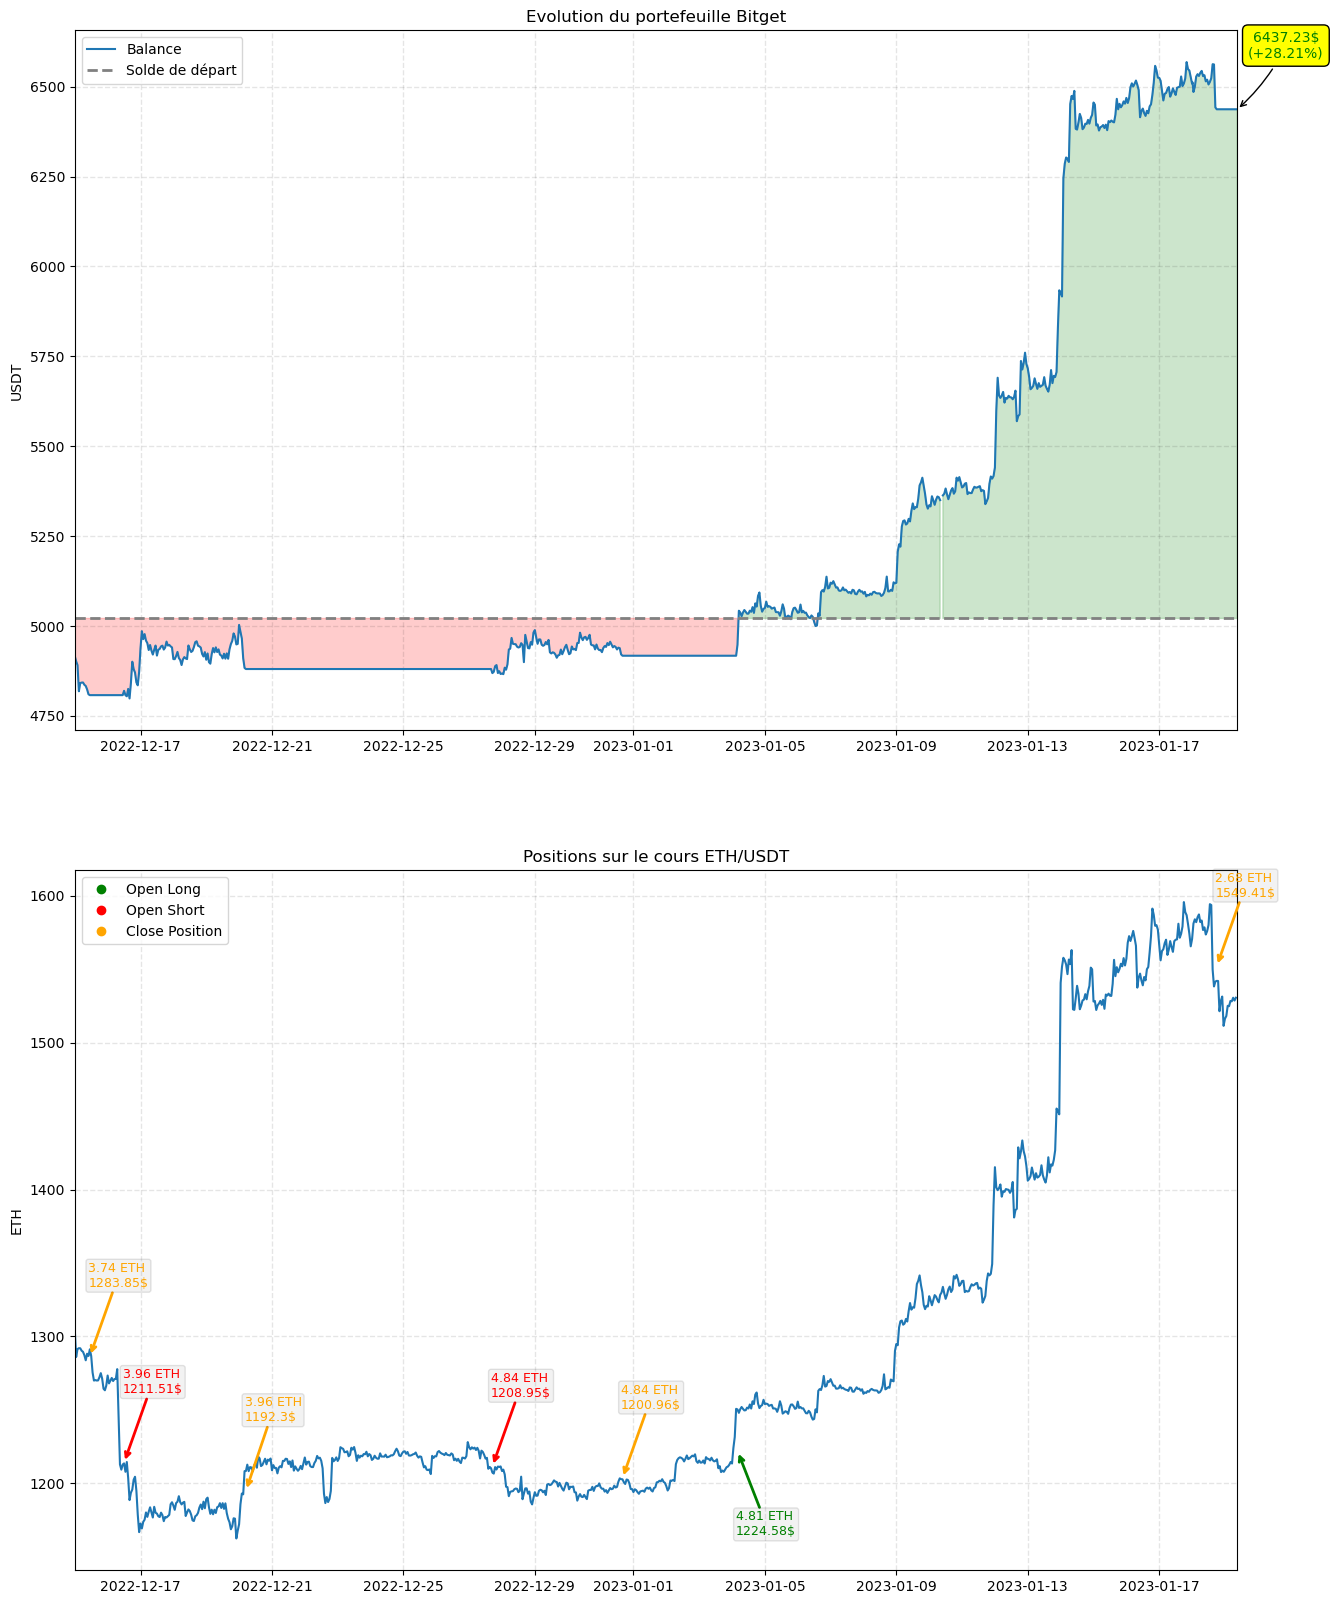

In [20]:
import matplotlib.lines

df_coin = df.copy()

with open("../../../cronlog.log", "r") as f:
    log = f.read()

coin = pair.split("/")[0]

# diviser le log en lignes s√©par√©es
lines = log.split("\n")

df_bitget = pd.DataFrame({"line": lines})

# filtrer DataFrame pour n'inclure que les lignes contenant les informations souhait√©es
df_bitget = df_bitget[df_bitget["line"].str.contains("--- Start Time :") | df_bitget["line"].str.contains("USD balance :") | 
        df_bitget["line"].str.contains("Place Open Short" ) | df_bitget["line"].str.contains("Place Open Long") |
        df_bitget["line"].str.contains("Place Close")]

# Extraction des informations souhait√©es √† l'aide de la manipulation de cha√Ænes et d'expressions r√©guli√®res
df_bitget['time'] = df_bitget['line'].str.extract(r"--- Start Time : (.*?) ---")
df_bitget['balance'] = df_bitget['line'].str.extract(r"USD balance : (.*?) \$")
df_bitget['balance'] = df_bitget['balance'].shift(-1)
df_bitget[['position', 'direction', 'size', 'price']] = df_bitget['line'].str.extract(r"Place (.*?) (.*?) Market Order: (.*?) ETH/USDT at (.*?)\$")
df_bitget[['position', 'direction', 'size', 'price']] = df_bitget[['position', 'direction', 'size', 'price']].shift(-2)

# Supression de la colonne line et de lignes vides
df_bitget.drop(columns=['line'], inplace=True)
df_bitget.dropna(how='all', inplace=True)

#df_bitget = df_bitget.append({'time': "12/01/2023 03:00:02", 'balance': 6400, 'position': "Open", 'direction': "Short", 'size': 5, 'price': 1400}, ignore_index=True)

df_bitget["time"] = pd.to_datetime(df_bitget["time"], format="%d/%m/%Y %H:%M:%S")
df_bitget["balance"] = df_bitget["balance"].astype(float)
df_bitget["size"] = df_bitget["size"].astype(float)
df_bitget["price"] = df_bitget["price"].astype(float)

start_balance = 5021
final_balance = df_bitget["balance"].iloc[-1]
difference = final_balance - start_balance
percentage_difference = (difference / start_balance) * 100

# Commencer le graphique depuis cette date
start_time = pd.to_datetime("12/15/2022")
df_filtered = df_bitget[df_bitget["time"] >= start_time]
df_coin = df_coin[df_coin.index >= start_time]

# Plot graph
plt.rcdefaults()
fig, ax_left = plt.subplots(figsize=(15, 20), nrows=2, ncols=1)

# 1er graph
ax_left[0].grid(True, which='both', color='black', linewidth=1, linestyle='--', alpha=0.1)
ax_left[0].title.set_text("Evolution du portefeuille Bitget")
ax_left[0].plot(df_filtered["time"], df_filtered["balance"], '-', label='Balance')
ax_left[0].plot([df_filtered["time"].min(), df_filtered["time"].max()], [start_balance, start_balance], '--', color='gray', linewidth=2, label='Solde de d√©part')
ax_left[0].fill_between(df_filtered["time"], df_filtered["balance"], start_balance, where=(df_filtered["balance"] < start_balance), color='red', alpha=0.2)
ax_left[0].fill_between(df_filtered["time"], df_filtered["balance"], start_balance, where=(df_filtered["balance"] >= start_balance), color='green', alpha=0.2)
ax_left[0].set_xlim(pd.Timestamp(start_time), df_filtered['time'].max())
ax_left[0].set_ylabel("USDT")
ax_left[0].legend()

# Gain ou pertes affich√© en haut √† droite
if percentage_difference >= 0:
    color = "green"
    sign = '+'
else:
    color = "red"
    sign = '-'
ax_left[0].annotate(f"{final_balance:.2f}$\n({sign}{percentage_difference:.2f}%)",
             xy=(df_filtered["time"].max(), final_balance), xytext=(35, 35),
             textcoords='offset points', ha='center', va='bottom', color=color,
             bbox=dict(boxstyle='round,pad=0.4', fc='yellow', alpha=1),
             arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=-0.1'))


# 2√®me graph
ax_left[1].grid(True, which='both', color='black', linewidth=1, linestyle='--', alpha=0.1)
ax_left[1].title.set_text("Positions sur le cours " + pair)
ax_left[1].plot(df_coin["close"], '-', label='ETH')
ax_left[1].set_xlim(pd.Timestamp(start_time), df_filtered['time'].max())
ax_left[1].set_ylabel(coin)

# Affichage des positions
font_size_position, linewidth, shrinkA, shrinkB = 9, 2, 0, 5

# Open Long
df_filtered = df_bitget.query("position == 'Open' and direction == 'Long'")

for index,row in df_filtered.iterrows():
    annotation1 = ax_left[1].annotate(f"{row['size']} {coin}\n{row['price']}$", xytext=(row['time'], row['price']-60),
                xy=(row['time'], row['price']),
                arrowprops=dict(color='green', arrowstyle='->', linewidth=linewidth, shrinkA=shrinkA, shrinkB=shrinkB), 
                bbox=dict(boxstyle='round,pad=0.2', fc='grey', alpha=0.1),
                fontsize = font_size_position, color='green')

# Open Short
df_filtered = df_bitget.query("position == 'Open' and direction == 'Short'")

for index,row in df_filtered.iterrows():
    annotation2 = ax_left[1].annotate(f"{row['size']} {coin}\n{row['price']}$", xytext=(row['time'], row['price']+50),
                xy=(row['time'], row['price']),
                arrowprops=dict(color='red', arrowstyle='->', linewidth=linewidth, shrinkA=shrinkA, shrinkB=shrinkB), 
                bbox=dict(boxstyle='round,pad=0.2', fc='grey', alpha=0.1),
                fontsize = font_size_position, color='red')

# Close Position
df_filtered = df_bitget.query("position == 'Close'")

for index,row in df_filtered.iterrows():
    annotation3 = ax_left[1].annotate(f"{row['size']} {coin}\n{row['price']}$", xytext=(row['time'], row['price']+50),
                xy=(row['time'], row['price']),
                arrowprops=dict(color='orange', arrowstyle='->', linewidth=linewidth, shrinkA=shrinkA, shrinkB=shrinkB), 
                bbox=dict(boxstyle='round,pad=0.2', fc='grey', alpha=0.1),
                fontsize = font_size_position, color='orange')
    
# Proxy Artist
proxy1 = matplotlib.lines.Line2D([0],[0], linestyle="none", c='green', marker = 'o')
proxy2 = matplotlib.lines.Line2D([0],[0], linestyle="none", c='red', marker = 'o')
proxy3 = matplotlib.lines.Line2D([0],[0], linestyle="none", c='orange', marker = 'o')
ax_left[1].legend([proxy1, proxy2, proxy3], ['Open Long', 'Open Short', 'Close Position'])

plt.savefig("balance.png", dpi = 300)
plt.show()

<H2>Tests divers</H2>

<AxesSubplot: xlabel='date'>

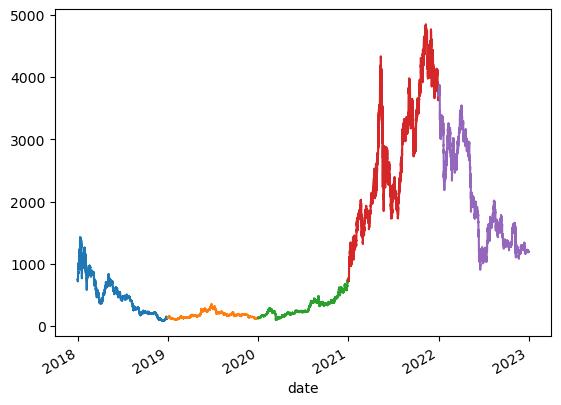

In [21]:
df.loc['2018-01-01':'2018-12-31', 'close' ].plot()
df.loc['2019-01-01':'2019-12-31', 'close' ].plot()
df.loc['2020-01-01':'2020-12-31', 'close' ].plot()
df.loc['2021-01-01':'2021-12-31', 'close' ].plot()
df.loc['2022-01-01':'2022-12-31', 'close' ].plot()

<H2>Anaylse Bull et Bear Market</H2>

In [22]:
raw_data_btc=pd.read_csv('../../../database/top_100//bitcoin.csv')
raw_data_eth=pd.read_csv('../../../database/top_100//ethereum.csv')

def date_format(df):
    if isinstance(df, pd.DataFrame):
        if 'Date' in df.columns:
            df.Date = pd.to_datetime(df.Date)
            df[['Year','Month','Day']] = df.Date.apply(lambda x: pd.Series(x.strftime("%Y-%m-%d").split("-")))
    else:
        print("Entr√©e non valide, veuillez utiliser un dataframe avec une colonne Date.")
    return df

data=date_format(raw_data_btc)
data['Close']=data['Close'].astype(float)
data['Open']=data['Open'].astype(float)
data['High']=data['High'].astype(float)
data['Low']=data['Low'].astype(float)
data['Year']=data['Year'].astype(int)
data['Month']=data['Month'].astype(int)
data['Day']=data['Day'].astype(int)

data_eth=date_format(raw_data_eth)
data_eth['Close']=data_eth['Close'].astype(float)
data_eth['Open']=data_eth['Open'].astype(float)
data_eth['High']=data_eth['High'].astype(float)
data_eth['Low']=data_eth['Low'].astype(float)
data_eth['Year']=data_eth['Year'].astype(int)
data_eth['Month']=data_eth['Month'].astype(int)
data_eth['Day']=data_eth['Day'].astype(int)


In [23]:
import plotly.graph_objects as go
from datetime import datetime

fig = go.Figure(data=go.Ohlc(x=data['Date'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close']))

x0_0, x1_0 = '2011-11-28', '2013-11-25'     #Bull
x0_1, x1_1 = '2013-11-25', '2016-04-11'     #Bear
x0_2, x1_2 = '2016-04-11', '2017-12-18'     #Bull
x0_3, x1_3 = '2017-12-18', '2020-03-09'     #Bear
x0_4, x1_4 = '2020-03-09', '2021-11-10'     #Bull

filtered_data = data.loc[(data['Date'] >= x0_0) & (data['Date'] <= x1_0)]
y0_0 = filtered_data['Close'].min()
y1_0 = filtered_data['Close'].max()
filtered_data = data.loc[(data['Date'] >= x0_1) & (data['Date'] <= x1_1)]
y0_1 = filtered_data['Close'].min()
y1_1 = filtered_data['Close'].max()
filtered_data = data.loc[(data['Date'] >= x0_2) & (data['Date'] <= x1_2)]
y0_2 = filtered_data['Close'].min()
y1_2 = filtered_data['Close'].max()
filtered_data = data.loc[(data['Date'] >= x0_3) & (data['Date'] <= x1_3)]
y0_3 = filtered_data['Close'].min()
y1_3 = filtered_data['Close'].max()
filtered_data = data.loc[(data['Date'] >= x0_4) & (data['Date'] <= x1_4)]
y0_4 = filtered_data['Close'].min()
y1_4 = filtered_data['Close'].max()

periods = [(x0_0, x1_0), (x0_1, x1_1), (x0_2, x1_2), (x0_3, x1_3), (x0_4, x1_4)]
for x0, x1 in periods:
    x0 = datetime.strptime(x0, '%Y-%m-%d')
    x1 = datetime.strptime(x1, '%Y-%m-%d')
    delta = x1 - x0
    days= delta.days
    print(f" {days} jours entre {x0} et {x1}")
    

fig.update_layout(template='plotly_dark',
    height = 550,
    title='Prix BTC au fil des ans',
    xaxis_title="Ann√©es",
    yaxis_title='Prix BTC',title_x=0.5,
    shapes = [dict(type='rect', x0=x0_0, y0=y0_0, x1=x1_0, y1=y1_0, fillcolor='rgba(0, 255, 0, 0.2)', line=dict(color='rgba(0, 255, 0, 1)')),
            dict(type='rect', x0=x0_1, y0=y0_1, x1=x1_1, y1=y1_1, fillcolor='rgba(255, 0, 0, 0.2)', line=dict(color='rgba(255, 0, 0, 1)')),
            dict(type='rect', x0=x0_2, y0=y0_2, x1=x1_2, y1=y1_2, fillcolor='rgba(0, 255, 0, 0.2)', line=dict(color='rgba(0, 255, 0, 1)')),
            dict(type='rect', x0=x0_3, y0=y0_3, x1=x1_3, y1=y1_3, fillcolor='rgba(255, 0, 0, 0.2)', line=dict(color='rgba(255, 0, 0, 1)')),
            dict(type='rect', x0=x0_4, y0=y0_4, x1=x1_4, y1=y1_4, fillcolor='rgba(0, 255, 0, 0.1)', line=dict(color='rgba(0, 255, 0, 1)')),
            # Halving
            dict(x0='2012-11-28', x1='2012-11-28', y0=0, y1=1, xref='x', yref='paper',line_width=1, line_dash='dot', line_color='yellow'),
            dict(x0='2016-07-09', x1='2016-07-09', y0=0, y1=1, xref='x', yref='paper',line_width=1, line_dash='dot', line_color='yellow'),
            dict(x0='2020-05-11', x1='2020-05-11', y0=0, y1=1, xref='x', yref='paper',line_width=1, line_dash='dot', line_color='yellow'),
            dict(x0='2024-03-17', x1='2024-03-17', y0=0, y1=1, xref='x', yref='paper',line_width=1, line_dash='dot', line_color='yellow')],
    annotations=[dict(x='2017-01-01', y=0.05, xref='x', yref='paper',showarrow=False, xanchor='left', text='bullüêÇ'),
        dict(x='2018-01-10', y=0.05, xref='x', yref='paper',showarrow=False, xanchor='left', text='bearüêª'),
        dict(x='2020-11-01', y=0.05, xref='x', yref='paper',showarrow=False, xanchor='left', text='bullüêÇ'),
        dict(x='2021-08-01', y=0.05, xref='x', yref='paper',showarrow=False, xanchor='left', text='bearüêª'),
        # Halving
        dict(x='2012-11-28', y=1.05, xref='x', yref='paper',showarrow=False, xanchor='center', text='Halving', font = dict(color = 'yellow')),
        dict(x='2016-07-09', y=1.05, xref='x', yref='paper',showarrow=False, xanchor='center', text='Halving', font = dict(color = 'yellow')),
        dict(x='2020-05-11', y=1.05, xref='x', yref='paper',showarrow=False, xanchor='center', text='Halving', font = dict(color = 'yellow')),
        dict(x='2024-03-17', y=1.05, xref='x', yref='paper',showarrow=False, xanchor='center', text='Halving', font = dict(color = 'yellow'))],
    updatemenus=[
        dict(type='buttons',
             buttons=[dict(label='Linear', method='relayout',args=[{'yaxis.type': 'linear'}]),
                      dict(label='Log', method='relayout', args=[{'yaxis.type': 'log'}])],
                      x=0, y=1.3, bgcolor = 'gray', bordercolor = 'blue', borderwidth = 2, font = dict(color = 'black')
            )]
)

fig.update_yaxes(
    tickprefix="$", showgrid=True
)

fig.update_xaxes(
     showgrid=True
)

fig.show()

 728 jours entre 2011-11-28 00:00:00 et 2013-11-25 00:00:00
 868 jours entre 2013-11-25 00:00:00 et 2016-04-11 00:00:00
 616 jours entre 2016-04-11 00:00:00 et 2017-12-18 00:00:00
 812 jours entre 2017-12-18 00:00:00 et 2020-03-09 00:00:00
 611 jours entre 2020-03-09 00:00:00 et 2021-11-10 00:00:00


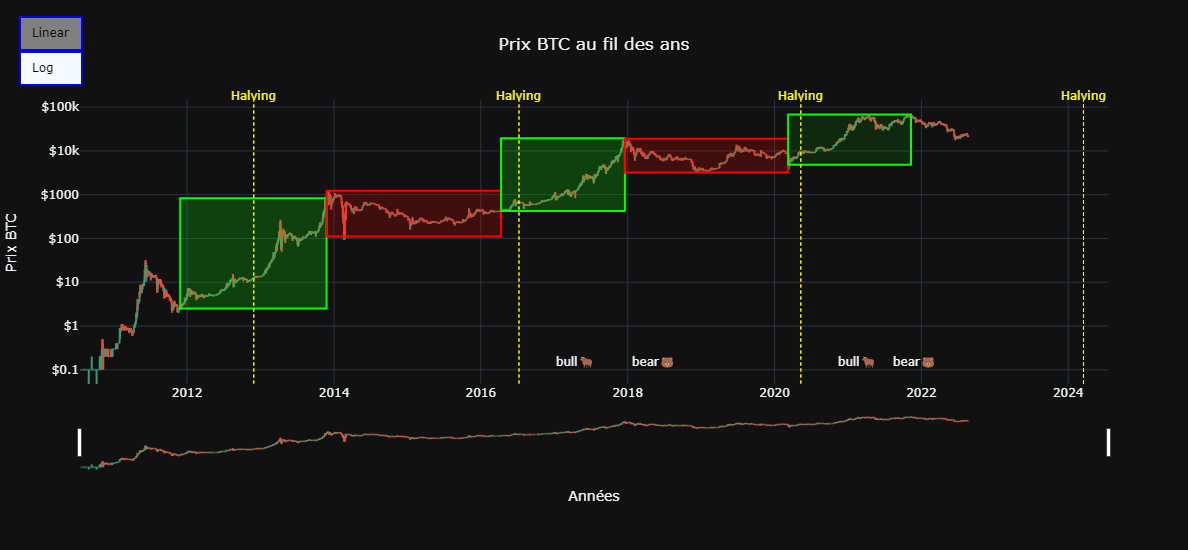

In [24]:
from IPython.display import Image
Image("BTC_bull_bear.png")

<H2>Test performances Cython</H2>

In [25]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [26]:
%%cython
import cython
from libc.math cimport exp, sqrt, pow, log, erf

@cython.cdivision(True)
@cython.boundscheck(False)
cpdef double std_norm_cdf(double x):
    return 0.5*(1+erf(x/sqrt(2)))

@cython.cdivision(True)
@cython.boundscheck(False)
cpdef double black_scholes_cy(double s, double k, double t, double v, double rf, double div, int cp):
    d1 = (log(s/k)+(rf-div+0.5*pow(v,2))*t)/(v*sqrt(t))
    d2 = d1 - v*sqrt(t)
    optprice = cp*s*exp(-div*t)*std_norm_cdf(cp*d1) - cp*k*exp(-rf*t)*std_norm_cdf(cp*d2)
    return optprice

In [27]:
from math import exp, sqrt, pow, log, erf

def std_norm_cdf_py(x):
    return 0.5*(1+erf(x/sqrt(2.0)))

def black_scholes_py(s, k, t, v, rf, div, cp):
    """Price an option using the Black-Scholes model.
    
    s : initial stock price
    k : strike price
    t : expiration time
    v : volatility
    rf : risk-free rate
    div : dividend
    cp : +1/-1 for call/put
    """
    d1 = (log(s/k)+(rf-div+0.5*pow(v,2))*t)/(v*sqrt(t))
    d2 = d1 - v*sqrt(t)
    optprice = cp*s*exp(-div*t)*std_norm_cdf_py(cp*d1) - \
        cp*k*exp(-rf*t)*std_norm_cdf_py(cp*d2)
    return optprice

In [28]:
%timeit black_scholes_cy(100.0, 100.0, 1.0, 0.3, 0.03, 0.0, -1) #cython
%timeit black_scholes_py(100.0, 100.0, 1.0, 0.3, 0.03, 0.0, -1) #python

252 ns ¬± 30.4 ns per loop (mean ¬± std. dev. of 7 runs, 1000000 loops each)
2.46 ¬µs ¬± 209 ns per loop (mean ¬± std. dev. of 7 runs, 100000 loops each)
